In [10]:
# 1. Grad Descent
# import modules
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math

In [3]:
# 1.1 define grad descent function
def grad_descent(x_init, alpha, thresh, f, f_prime):
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while(sum(abs(prev-next)) >= thresh):
        prev = next
        next = prev - alpha*f_prime(prev)
        iter += 1
        
    return np.append(next, f(next))
    #print "Iterations = ", iter

In [6]:
# import data for grad descent
import pylab as pl

def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('/Users/becca/Documents/Google Drive/Dropbox/Grad School/ML/code_hw1/P1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 

In [7]:
# define variables for gaussian and quadratic bowl functions
gaussMean = getData()[0]
gaussCov = getData()[1]
n = gaussMean.shape[0]
quadBowlA = getData()[2]
quadBowlB = getData()[3]

In [8]:
# Quadratic Bowl functions
f = lambda x: 0.5 * np.dot(np.dot(x, quadBowlA), x.T) - np.dot(x, quadBowlB)
f_prime = lambda x: np.dot(quadBowlA, x.T) - quadBowlB
x = np.array([30, 26.667])

array([ 33.335,  16.67 ])

In [9]:
# Gaussian functions
from operator import truediv
f = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
f_prime = lambda x: np.dot(np.dot(-f(x), inv(gaussCov)), (x-gaussMean))

In [ ]:
# 1.2. Numerical Gradient Evaluation
# Gaussian functions
f = lambda x: -10**4/((2*math.pi)**n*np.linalg.det(gaussCov))**(1/2)*np.exp(-1/2*np.dot(np.dot((x-gaussMean).T,inv(gaussCov)),(x-gaussMean)))
delta = np.array([1e-10, 1e-10])
f_prime = lambda x: np.array([((f(x[0]+delta)-f(x[0]))/delta)[0], ((f(x[1]+delta)-f(x[1]))/delta)[1]])
x = np.array([10, 11])

In [11]:
# Need to do numerical gradient evaluation for quadratic bowl!!



In [20]:
# 1.3. Stochastic Gradient Descent
# retrieve data
def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    xp1 = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_x.txt')
    yp1 = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P1/fittingdatap1_y.txt')

    return (xp1,yp1) 



In [43]:
# define variables
xp1 = getData()[0]
yp1 = getData()[1]

# closed form soln:
w = np.dot(np.dot(inv(np.dot(xp1.T, xp1)), xp1.T), yp1)
w

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [174]:
# Define LMS function and derivative
f = lambda w: sum((np.dot(xp1,w)-yp1)**2)
f_prime = lambda w: (2*np.dot((np.dot(xp1,w)-yp1), xp1))
f_prime(w)

array([  9.36668948e-11,  -3.18711949e-11,  -9.22887588e-11,
        -1.64776378e-10,   1.03009487e-10,  -8.93619715e-11,
        -6.25343613e-11,  -5.73104542e-11,  -4.17318354e-10,
        -5.15504244e-10])

In [149]:
# Define initial value for test
w_init = w+1
w_init

array([  1.5032541 ,  -1.3367948 ,  -5.31670032,   7.81230107,
        -0.06337989,   7.67469398,   4.4118044 ,   0.54426408,
       -11.94593466,  16.73289812])

In [163]:
# Define grad descent with modified obj criterion
def grad_descent(x_init, alpha, thresh, f, f_prime):
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev)
    
    while(sum(abs(f_prime(next)))) >= thresh:
        prev = next
        next = prev - alpha*f_prime(prev)
        iter += 1
        
    return np.append(next, f(next))
    #print "Iterations = ", iter

In [171]:
# Test
# working now but with poor convergence
w_init = w+1

grad_descent(w_init, 1e-8, 12, f, f_prime)


array([  5.03239942e-01,  -2.33675857e+00,  -6.31672875e+00,
         6.81230347e+00,  -1.06335617e+00,   6.67473759e+00,
         3.41189702e+00,  -4.55730185e-01,  -1.29459496e+01,
         1.57328925e+01,   8.33321452e+03])

In [ ]:
# Stochastic gradient descent - define function with input i = index of data for gradient
# This is working
f = lambda w: sum((np.dot(xp1,w)-yp1)**2)
f_prime = lambda w, i: (2*np.dot((np.dot(xp1[i],w)-yp1[i]), xp1[i]))
f_prime(w, 1)

In [331]:
# Stochastic gradient descent function - not working
# nrounds - define rounds of data to iterate through

def stoch_grad_descent(x_init, alpha, thresh, f, f_prime, nrounds):
    i=0
    iter = 1
    prev = x_init
    next = x_init - alpha*f_prime(prev, i)
    
    for j in range(0, (nrounds-1)):
        for i in range(0, 99):
            prev = next
            next = prev - alpha*f_prime(prev, i)
            i+=1
            iter += 1
            if(sum(abs(f_prime(next, range(0, 99))))) <= thresh:
                return np.append(next, f(next)), iter
                #print "Iterations = ", iter
        j+=1
    if(sum(abs(f_prime(next, range(0, 99))))) <= thresh:
        return np.append(next, f(next)), iter
    else:
        return "Did not converge, min cost was: ", sum(abs(f_prime(next, range(0, 99)))), iter
                #return "Not converged"
        
    #return np.append(next, f(next)), iter
    #print "Iterations = ", iter

In [265]:
# Testing part of stoch grad descent loop to troubleshoot
# not working...
x_init = w
i=0
alpha = 1e-4
iter = 1
prev = x_init
next = x_init - alpha*f_prime(prev, i)
next
thresh = 1e-2
for j in range(0, 2):
       for i in range(0, 99):
        prev = next
            i +=1
            iter += 1
                
# np.append(next, f(next))
# next
# sum(abs(f_prime(next, range(0,100))))


201

In [ ]:
# test SGD function
stoch_grad_descent(w+0.0001, 1e-20, 2000, f, f_prime, 1000)
# not converging.. is iterating but seems like cost not decreasing

In [7]:
# Problem 2.
# Linear Basis Function Regression
# import data and plot
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('/Users/becca/GitHub/6.867/code_hw1/P2/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

In [150]:
# define variables
X = getData(ifPlotData = False)[0]
Y = getData(ifPlotData = False)[1]

In [127]:
# define polyx function - takes x and degree, returns array of x's up to given degree, including added col of ones
def polyx(Xplot, degree):
    if degree in range(0,1):
        Xnew = np.ones((11,1))
        return Xnew
    elif degree in range(1,2):
        Xnew = np.hstack((np.ones((11, 1)), Xplot.T))
        return Xnew
    else:
        Xnew = np.hstack((np.ones((11, 1)), Xplot.T))
        for i in range(2, degree+1):
            Xnew = np.hstack((Xnew, Xplot.T**i))
            i += 1
            
        return Xnew

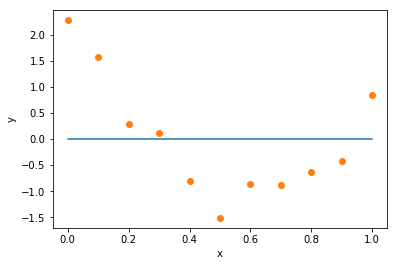

In [136]:
# 2.1. Polynomial Fit
# Note: code for fits is the same, change m only
# m = 0
m = 0
Xplot = X[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[np.newaxis].T[::-1])
Yplot = np.reshape(Yplot, (1,np.product(Yplot.shape)))[0]

plt.plot(X, Yplot, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

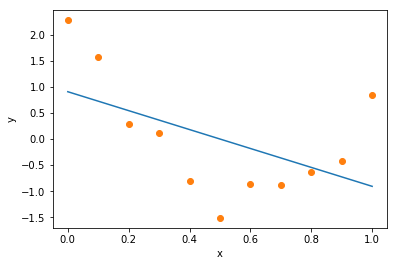

In [134]:
# m = 1
m = 1
Xplot = X[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[np.newaxis].T[::-1])
Yplot = np.reshape(Yplot, (1,np.product(Yplot.shape)))[0]

plt.plot(X, Yplot, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

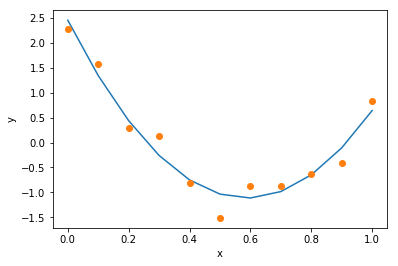

In [135]:
# m = 2
m = 2
Xplot = X[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[np.newaxis].T[::-1])

plt.plot(X, Yplot, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

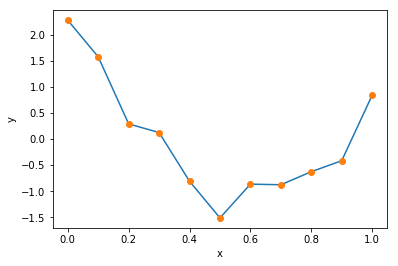

In [137]:
# m = 10
m = 10
Xplot = X[np.newaxis]
Yplot = np.dot(polyx(Xplot, m),np.polyfit(X, Y, m)[np.newaxis].T[::-1])

plt.plot(X, Yplot, '-')
plt.plot(X, Y, 'o')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [236]:
#2.2 Compute SSE and gradient given degree
Y = np.reshape(Y, (11,1))
f = lambda w, m: 0.5*sum((np.dot(polyx(Xplot, m), w)-Y)**2)
f_prime = lambda w, m: np.dot(polyx(Xplot, m).T,(np.dot(polyx(Xplot, m), w)-Y)) 

In [226]:
# SSE test 0 - confirmed that is working
m=10
w=np.polyfit(X, Y, m)[::-1]

Y = np.reshape(Y, (11,1))
.5*sum((np.dot(polyx(Xplot, 10), w)-Y)**2)

array([  2.54526778e-19])

In [227]:
f(w, 10)

array([  2.54526778e-19])

In [242]:
w

array([[  2.45618252],
       [-12.150438  ],
       [ 10.33761072]])

In [240]:
# 2.3 Define batch grad descent function for polynomial:
def grad_descent_multi(w_init, alpha, thresh, f, f_prime, m):
    iter = 1
    prev = w_init
    next = w_init - alpha*f_prime(prev, m)
    
    while(sum(abs(f_prime(next, m)))) >= thresh:
        prev = next
        next = prev - alpha*f_prime(prev, m)
        iter += 1
        
    return np.append(next, f(next, m))
    #print "Iterations = ", iter

In [ ]:
# Test function - works!
grad_descent_multi(w+3, .01, 1e-5, f, f_prime, 2)

In [ ]:
# 2.3 Continued. Need to test with SGD!!

In [241]:
# 2.4 Cosine

array([  2.45620123, -12.15055147,  10.33771957,   0.34643172])